# Import the packages

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Read Train Dataset

In [4]:
df_train = pd.read_csv('D:/data set/amazon_review_polarity_csv/amazon_review_polarity_csv/train.csv', header=None, names=['class_index', 'review_title', 'review_text'])
df_train.index.name = 'review_id'
df_train.head(5)

,class_index,review_title,review_text
review_id,,,
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


## Read Test Dataset

In [6]:
df_test = pd.read_csv('D:/data set/amazon_review_polarity_csv/amazon_review_polarity_csv/test.csv', header=None, names=['class_index', 'review_title', 'review_text'])
df_test.index.name = 'review_id'

In [8]:
df_test.head(5)

,class_index,review_title,review_text
review_id,,,
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


## inspect the data
#### we will work with 180000 of train dataset and 20000 of test dataset

In [14]:
df_train = df_train.sample(180000)
df_test = df_test.sample(20000)

In [16]:
df_train.shape

(180000, 3)

In [18]:
df_test.shape

(20000, 3)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 892776 to 1792071
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   class_index   180000 non-null  int64 
 1   review_title  179993 non-null  object
 2   review_text   180000 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.5+ MB


In [27]:
df_train.isnull().sum()

class_index     0
review_title    7
review_text     0
dtype: int64

In [29]:
df_test.isnull().sum()

class_index     0
review_title    2
review_text     0
dtype: int64

In [31]:
df_train.duplicated().sum()

0

In [33]:
df_test.duplicated().sum()

0

In [35]:
# Separate features and target
X_train = df_train['review_text']
X_test = df_test['review_text']
y_train = df_train['class_index']
y_test = df_test['class_index']

In [37]:
# Vectorize the text data using TF-IDF without any cleaning
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, ngram_range=(1, 2), stop_words='english')

# Fit the vectorizer on training data and transform both train and test sets
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [39]:
model = LogisticRegression(max_iter=1000)

In [41]:
# Train the model
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [43]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(f'Initial Accuracy (no cleaning): {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Initial Accuracy (no cleaning): 0.8708
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.86      0.87     10016
           2       0.87      0.88      0.87      9984

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000



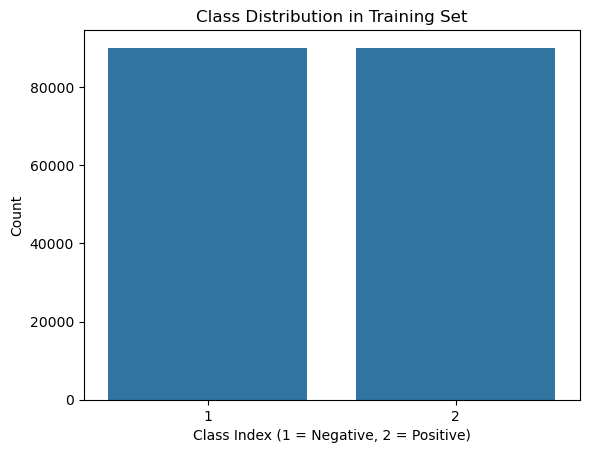

In [45]:
# Visualizing the distribution of class labels
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Index (1 = Negative, 2 = Positive)")
plt.ylabel("Count")
plt.show()


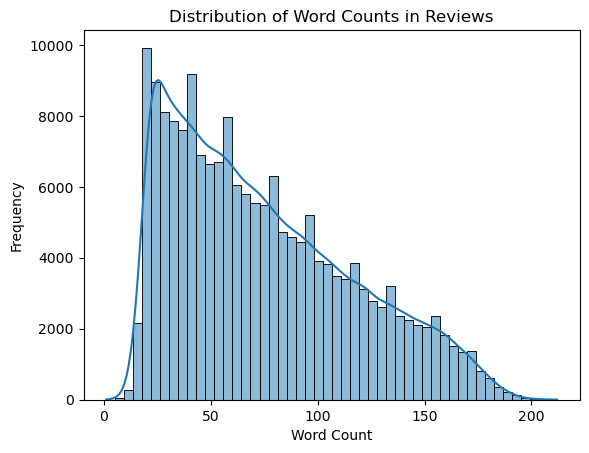

In [47]:
# Calculate word counts
df_train['word_count'] = df_train['review_text'].apply(lambda x: len(x.split()))

# Plot distribution of word counts
sns.histplot(df_train['word_count'], bins=50, kde=True)
plt.title("Distribution of Word Counts in Reviews")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

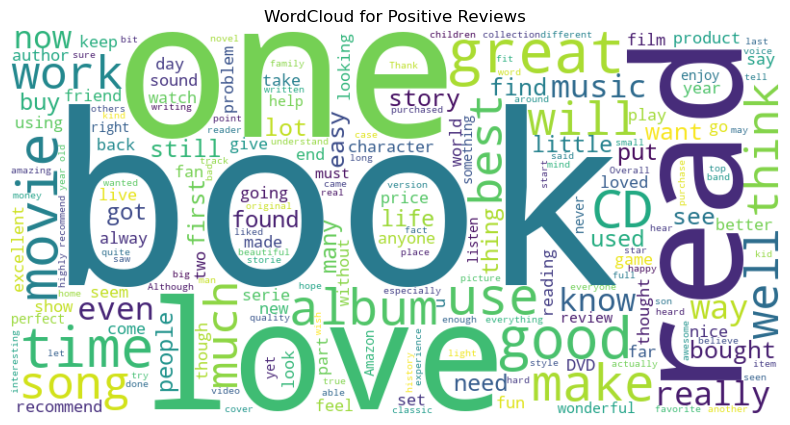

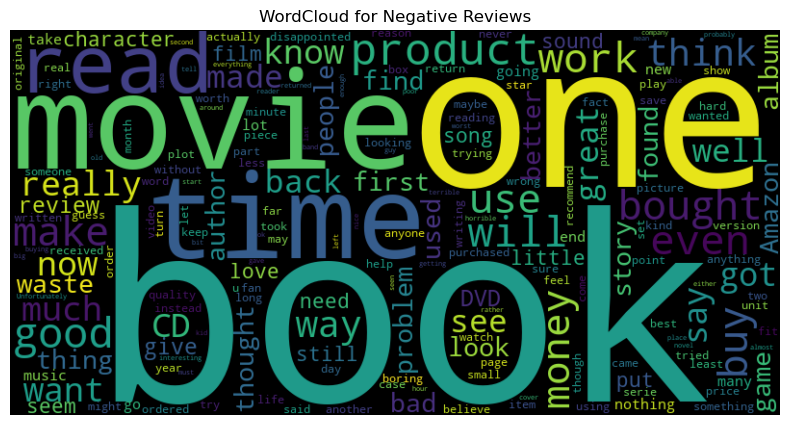

In [49]:
from collections import Counter
from wordcloud import WordCloud

# Generate WordCloud for positive reviews
positive_text = " ".join(df_train[df_train['class_index'] == 2]['review_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("WordCloud for Positive Reviews")
plt.axis('off')
plt.show()

# Generate WordCloud for negative reviews
negative_text = " ".join(df_train[df_train['class_index'] == 1]['review_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("WordCloud for Negative Reviews")
plt.axis('off')
plt.show()


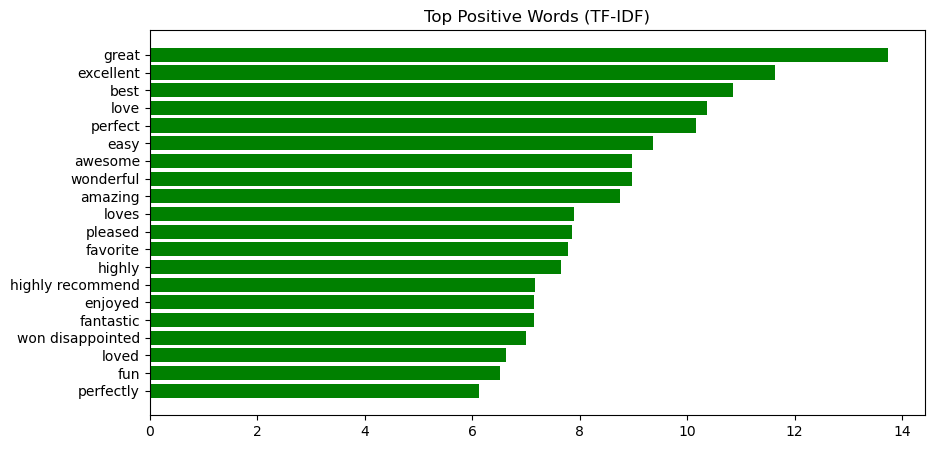

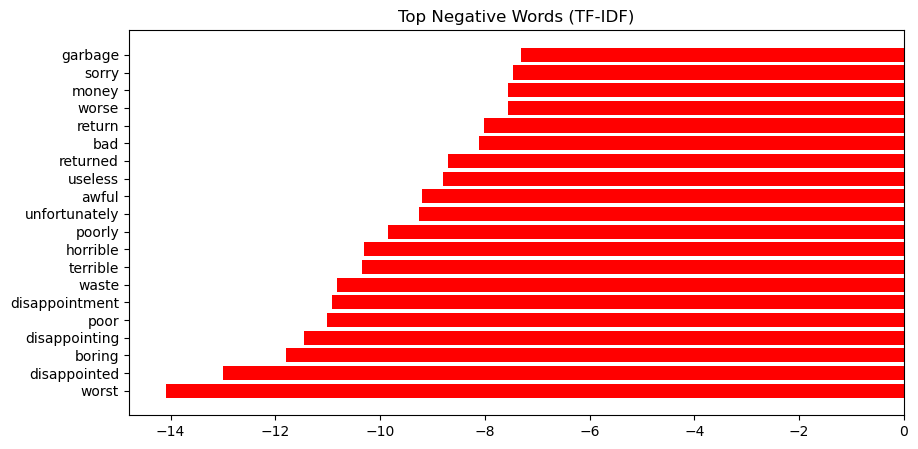

In [50]:
# Get feature names and their importance
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_.flatten()

# Sort and get top 20 positive and negative words
top_positive_indices = coefs.argsort()[-20:]
top_negative_indices = coefs.argsort()[:20]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(range(20), coefs[top_positive_indices], align='center', color='green')
plt.yticks(range(20), [feature_names[i] for i in top_positive_indices])
plt.title("Top Positive Words (TF-IDF)")
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(range(20), coefs[top_negative_indices], align='center', color='red')
plt.yticks(range(20), [feature_names[i] for i in top_negative_indices])
plt.title("Top Negative Words (TF-IDF)")
plt.show()


In [53]:
df_train.drop(columns=['word_count'], inplace=True)

In [55]:
df_train['label'] = df_train.class_index.map({2:0, 1:1})

In [57]:
df_train.head(5)

,class_index,review_title,review_text,label
review_id,,,,
892776,1,Disappointed,I was so disappointed when I received this CD....,1
2508669,1,Blue screen of death,"Unfortunately, this kit doesn't work at all - ...",1
2202377,2,Beautiful and Adorable Book!,"I love this book, it's so adorable and beautif...",0
2409168,1,An expensive disappointment,I bought this phone to replace an aging motoro...,1
829452,2,Sea Hunt TV Series (24 Hour Marathon,What a hoot ! Exactly as I remember it... Full...,0


In [67]:
df_train['full_review'] = df_train.review_title.fillna('') + " " + df_train.review_text 

In [61]:
df_train.head(5)

,class_index,review_title,review_text,label,full_review
review_id,,,,,
892776,1,Disappointed,I was so disappointed when I received this CD....,1,Disappointed I was so disappointed when I rece...
2508669,1,Blue screen of death,"Unfortunately, this kit doesn't work at all - ...",1,"Blue screen of death Unfortunately, this kit d..."
2202377,2,Beautiful and Adorable Book!,"I love this book, it's so adorable and beautif...",0,"Beautiful and Adorable Book! I love this book,..."
2409168,1,An expensive disappointment,I bought this phone to replace an aging motoro...,1,An expensive disappointment I bought this phon...
829452,2,Sea Hunt TV Series (24 Hour Marathon,What a hoot ! Exactly as I remember it... Full...,0,Sea Hunt TV Series (24 Hour Marathon What a ho...


In [63]:
df_train[df_train.review_title.isnull()]

,class_index,review_title,review_text,label,full_review
review_id,,,,,
1344514,1,NaN,after reading and adoring A Prayer For Owen Me...,1,after reading and adoring A Prayer For Owen M...
1734074,1,NaN,Sadely worthless without drawing or figure. Do...,1,Sadely worthless without drawing or figure. D...
1715505,1,NaN,yikes...... started out informative and rapidl...,1,yikes...... started out informative and rapid...
2705768,1,NaN,the kindle edition does not reproduce the russ...,1,the kindle edition does not reproduce the rus...
872693,1,NaN,"Not the most original thing out there, Sahg's ...",1,"Not the most original thing out there, Sahg's..."
1660667,2,NaN,"Great CD, Dennis always performs well, and thi...",0,"Great CD, Dennis always performs well, and th..."
26554,1,NaN,What separates this band from Evanescence (bes...,1,What separates this band from Evanescence (be...


In [71]:
# Calculate the average length of the full review
full_review_avg_length = np.mean(df_train['full_review'].apply(len))
print(full_review_avg_length) 

430.65448333333336


In [73]:
# check for very short reviews 

short_reviews = df_train[df_train['full_review'].apply(lambda x: len(x.split()) < 10)]

short_reviews.label.value_counts()

print(f"Number of short reviews: {len(short_reviews)}")

Number of short reviews: 2


In [75]:
df_train.head()

,class_index,review_title,review_text,label,full_review
review_id,,,,,
892776,1,Disappointed,I was so disappointed when I received this CD....,1,Disappointed I was so disappointed when I rece...
2508669,1,Blue screen of death,"Unfortunately, this kit doesn't work at all - ...",1,"Blue screen of death Unfortunately, this kit d..."
2202377,2,Beautiful and Adorable Book!,"I love this book, it's so adorable and beautif...",0,"Beautiful and Adorable Book! I love this book,..."
2409168,1,An expensive disappointment,I bought this phone to replace an aging motoro...,1,An expensive disappointment I bought this phon...
829452,2,Sea Hunt TV Series (24 Hour Marathon,What a hoot ! Exactly as I remember it... Full...,0,Sea Hunt TV Series (24 Hour Marathon What a ho...


In [77]:
# Fill missing values in the review_title column with empty string
df_train['review_title'] = df_train['review_title'].fillna('')
df_test['review_title'] = df_test['review_title'].fillna('')

# Combine review_title and review_text to create a full review column
df_test['full_review'] = df_test['review_title'] + " " + df_test['review_text']


In [79]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from cleantext import clean
from joblib import Parallel, delayed
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from tqdm import tqdm

In [ ]:
# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [81]:
# Initialize NLTK lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [83]:
# Custom stopwords to keep (e.g., "not", "no", "nor")
stopwords_to_keep = {"not", "no", "nor"}
custom_stopwords = stop_words - stopwords_to_keep
# Pre-compile regex patterns for optimization
repeated_char_pattern = re.compile(r'(.)\1{3,}')
repeated_word_pattern = re.compile(r'\b(\w+)( \1\b)+')

In [85]:

def clean_text_step(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    
    # Remove emails
    text = re.sub(r"\S+@\S+\.\S+", "", text)
    
    # Remove phone numbers (basic format)
    text = re.sub(r"\b\d{10,}\b", "", text)  # Remove long sequences of digits
    
    # Remove digits
    text = re.sub(r"\d+", "", text)
    
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    return text


### Step 2: Remove Gibberish ###
def remove_gibberish_step(text):
    text = repeated_char_pattern.sub(r'\1', text)
    text = repeated_word_pattern.sub(r'\1', text)
    return text

### Step 3: Tokenization ###
def tokenize_step(text):
    # Tokenize by splitting on whitespace and handling basic punctuation (remove non-alphabetic characters)
    return re.findall(r'\b\w+\b', text)


### Step 4: Lemmatization and Stopword Removal ###
def lemmatize_and_remove_stopwords_step(tokens):
    return [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in custom_stopwords and token.isalpha()]

### Combined Preprocessing Function ###
def preprocess_text(text):
    # Step-by-step preprocessing
    text = clean_text_step(text)
    text = remove_gibberish_step(text)
    tokens = tokenize_step(text)
    tokens = lemmatize_and_remove_stopwords_step(tokens)
    
    # Join tokens back to a single string
    return " ".join(tokens)

In [87]:
df_train['cleaned_text'] = df_train['full_review'].apply(clean_text_step)
df_test['cleaned_text'] = df_test['full_review'].apply(clean_text_step)

In [89]:
df_train['no_gibberish'] = df_train['cleaned_text'].apply(remove_gibberish_step)
df_test['no_gibberish'] = df_test['cleaned_text'].apply(remove_gibberish_step)

In [91]:
df_train['tokens'] = df_train['no_gibberish'].apply(tokenize_step)
df_test['tokens'] = df_test['no_gibberish'].apply(tokenize_step)

In [93]:
df_train['lemmatized_text'] = df_train['full_review'].apply(lambda x: preprocess_text(x))
df_test['lemmatized_text'] = df_test['full_review'].apply(lambda x: preprocess_text(x))

In [95]:
df_train.head(5)

,class_index,review_title,review_text,label,full_review,cleaned_text,no_gibberish,tokens,lemmatized_text
review_id,,,,,,,,,
892776,1,Disappointed,I was so disappointed when I received this CD....,1,Disappointed I was so disappointed when I rece...,disappointed i was so disappointed when i rece...,disappointed i was so disappointed when i rece...,"[disappointed, i, was, so, disappointed, when,...",disappointed disappointed received cd wasnt ex...
2508669,1,Blue screen of death,"Unfortunately, this kit doesn't work at all - ...",1,"Blue screen of death Unfortunately, this kit d...",blue screen of death unfortunately this kit do...,blue screen of death unfortunately this kit do...,"[blue, screen, of, death, unfortunately, this,...",blue screen death unfortunately kit doesnt wor...
2202377,2,Beautiful and Adorable Book!,"I love this book, it's so adorable and beautif...",0,"Beautiful and Adorable Book! I love this book,...",beautiful and adorable book i love this book i...,beautiful and adorable book i love this book i...,"[beautiful, and, adorable, book, i, love, this...",beautiful adorable book love book adorable bea...
2409168,1,An expensive disappointment,I bought this phone to replace an aging motoro...,1,An expensive disappointment I bought this phon...,an expensive disappointment i bought this phon...,an expensive disappointment i bought this phon...,"[an, expensive, disappointment, i, bought, thi...",expensive disappointment bought phone replace ...
829452,2,Sea Hunt TV Series (24 Hour Marathon,What a hoot ! Exactly as I remember it... Full...,0,Sea Hunt TV Series (24 Hour Marathon What a ho...,sea hunt tv series hour marathon what a hoot ...,sea hunt tv series hour marathon what a hoot ...,"[sea, hunt, tv, series, hour, marathon, what, ...",sea hunt tv series hour marathon hoot exactly ...


In [97]:
df_test.head(5)

,class_index,review_title,review_text,full_review,cleaned_text,no_gibberish,tokens,lemmatized_text
review_id,,,,,,,,
259167,2,Cold Steel Warrior Katana,This item really lives up to it's video hype. ...,Cold Steel Warrior Katana This item really liv...,cold steel warrior katana this item really liv...,cold steel warrior katana this item really liv...,"[cold, steel, warrior, katana, this, item, rea...",cold steel warrior katana item really life vid...
352054,2,......................dude.......................,I aint never dun seen a game as tight as this ...,......................dude.......................,dude i aint never dun seen a game as tight as ...,dude i aint never dun seen a game as tight as ...,"[dude, i, aint, never, dun, seen, a, game, as,...",dude aint never dun seen game tight unit freak...
186153,1,Way over-powered,I thought the extra power would be great when ...,Way over-powered I thought the extra power wou...,way overpowered i thought the extra power woul...,way overpowered i thought the extra power woul...,"[way, overpowered, i, thought, the, extra, pow...",way overpowered thought extra power would grea...
98566,1,A short advice from a big fan of Video Kids,First I heard Video Kids in the USSR in 1985. ...,A short advice from a big fan of Video Kids Fi...,a short advice from a big fan of video kids fi...,a short advice from a big fan of video kids fi...,"[a, short, advice, from, a, big, fan, of, vide...",short advice big fan video kid first heard vid...
145425,1,Not worth the money,I do not suggest buying this book unless you k...,Not worth the money I do not suggest buying th...,not worth the money i do not suggest buying th...,not worth the money i do not suggest buying th...,"[not, worth, the, money, i, do, not, suggest, ...",not worth money not suggest buying book unless...


In [126]:
# Separate features and target for the cleaned dataset
X_train_clean = df_train['no_gibberish']
X_test_clean = df_test['no_gibberish']
y_train_clean = df_train['class_index']  # Correct column name
y_test_clean = df_test['class_index']    # Correct column name

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [128]:
# Vectorize the text data using TF-IDF without any cleaning
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, ngram_range=(1, 2), stop_words='english')

# Fit the vectorizer on training data and transform both train and test sets
X_train_tfidf_clean = vectorizer.fit_transform(X_train_clean).tocsc()
X_test_tfidf_clean = vectorizer.transform(X_test_clean).tocsc()

In [130]:
# Define the model
model = LogisticRegression(max_iter=1000)

In [132]:
# Train the model using the training data
model.fit(X_train_tfidf_clean, y_train_clean)

LogisticRegression(max_iter=1000)

In [134]:
# Predict on the test data
y_pred = model.predict(X_test_tfidf_clean)

In [138]:
# Evaluate the model
print(f'Final Accuracy (with cleaning): {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Final Accuracy (with cleaning): 0.8925
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.89      0.89     10016
           2       0.89      0.90      0.89      9984

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000

